<a href="https://colab.research.google.com/github/fedhere/MLTSA22_FBianco/blob/main/Lab3ProgrammaticDataAccess/Kaggledata_load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROGRAMMATIC ACCESS TO KAGGLE CHALLENGE DATA

Accessing data programmatically important to achieve our reproducibility goals: this way you can just hand off a notebook and, so long as the links have not died or changed since you wrote your code (which would not be your fault) your audience can just run your code without ambiguity

Enabling this will be done from the notebook with python commands and system commands invoked from the python notebook interface (via "!" as you will see)

Here is a list of the system commands you will use:

- _pwd_ - present working directory: a command to know which folder you are currently running commands from
- _cd_ \<path\> - moves you to a folder as specified by path
- _ls_ \<path\> - list: lists the content of the folder you specify by its path, or of the folder you are in if you do not add any path
- _chmod_ \<permissions\> \<path\> - changes the access permission to a folder or file, you will use to make sure that exgternal users cannot see your Kaggle API login information
- _pip install_ \<package name\> installs a packages (system packages or python modules) onto your colab session

Finally, after you install the Kaggle package, you will have access to a new command _kaggle_

In [41]:
import pandas as pd
import numpy as np
import pylab as pl
import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA22_FBianco/master/fbb.mplstyle")

# data ingestion

In [16]:
# download kaggle economic data
#https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/data#a.us.txt


In [17]:
!pip install kaggle


In [20]:
# connect your google colab notebook to your google drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [21]:
# this stands for present working directory, 
# the ! indicates that it is a "system", not a python command
!pwd 


/content


In [22]:
#this command moves you to your own google drive (the same "folder" you see when you open google Drive)
#NOTE: it needs to be in a cell by itself or it wont work

In [23]:
cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [24]:
#make an account on Kaggle, ls kaggle.json, see slides
# the following command shows that indeed I have a .kaggle folder 
# and that kaggle.json is inside of the .kaggle folder
!ls .kaggle

kaggle.json


In [25]:
cd /content/gdrive/MyDrive/.kaggle

/content/gdrive/MyDrive/.kaggle


In [26]:
#IMPORTANT! this command keeps your personal data safe
!chmod 600 kaggle.json

Now we can access Kaggle data programmatically

In [27]:
#set an variable in your system that saves your data from kaggle.json
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']


In [28]:
os.environ

environ({'NO_GCE_CHECK': 'True', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', 'CUDA_VERSION': '11.1.1', 'PATH': '/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin', 'HOME': '/root', 'LD_LIBRARY_PATH': '/usr/local/nvidia/lib:/usr/local/nvidia/lib64', 'LANG': 'en_US.UTF-8', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'SHLVL': '0', 'GCE_METADATA_TIMEOUT': '0', 'NCCL_VERSION': '2.7.8', 'NVIDIA_VISIBLE_DEVICES': 'all', 'DEBIAN_FRONTEND': 'noninteractive', 'CUDNN_VERSION': '8.0.5.39', 'LAST_FORCED_REBUILD': '20220127', 'JPY_PARENT_PID': '53', 'PYTHONPATH': '/env/python', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""],"debugAdapterMultiplexerPath":"/usr/local/bin/dap_multiplexer","enableLsp":true}', 'ENV': '/root/.bashrc', 'GLIBCXX_FORCE_NEW

In [29]:
#check that it worked by listing the kaggle datasets
!kaggle datasets 

usage: kaggle datasets [-h]
                       {list,files,download,create,version,init,metadata,status}
                       ...
kaggle datasets: error: too few arguments


In [30]:
!kaggle competitions list -s health



ref                                            deadline             category       reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ----------  ---------  ---------  --------------  
hhp                                            2013-04-04 07:00:00  Featured     $500,000       1350           False  
nfl-health-and-safety-helmet-assignment        2021-11-02 23:59:00  Featured     $100,000        825           False  
nbme-score-clinical-patient-notes              2022-05-03 23:59:00  Featured      $50,000        324           False  
datasciencebowl                                2015-03-16 23:59:00  Featured     $175,000       1049           False  
stanford-covid-vaccine                         2020-10-06 23:59:00  Research      $25,000       1636           False  
hubmap-kidney-segmentation                     2021-05-10 23:59:00  Research      $60,000       1200           False  
osic-pulmonary-fibrosis-progression            2

In [31]:
!kaggle datasets list -s finance

ref                                                      title                                                 size  lastUpdated          downloadCount  
-------------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  
kaggle/us-consumer-finance-complaints                    US Consumer Finance Complaints                        84MB  2019-11-14 05:52:29          16534  
stefanoleone992/mutual-funds-and-etfs                    US Funds dataset from Yahoo Finance                  353MB  2021-12-11 16:06:22           5425  
jilkothari/finance-accounting-courses-udemy-13k-course   Finance & Accounting Courses - Udemy (13K+ course)  1000KB  2020-09-17 12:46:12           4152  
danerbland/electionfinance                               Campaign Finance versus Election Results             209KB  2016-12-07 21:14:32           1932  
nitindatta/finance-data                                  Finance Data       

In [32]:
!kaggle datasets list -s stock

ref                                                       title                                      size  lastUpdated          downloadCount  
--------------------------------------------------------  ----------------------------------------  -----  -------------------  -------------  
mattiuzc/stock-exchange-data                              Stock Exchange Data                         5MB  2021-06-07 20:51:55          13558  
borismarjanovic/price-volume-data-for-all-us-stocks-etfs  Huge Stock Market Dataset                 492MB  2017-11-16 14:53:29          83988  
dgawlik/nyse                                              New York Stock Exchange                    31MB  2017-02-22 10:18:25          63105  
jacksoncrow/stock-market-dataset                          Stock Market Dataset                      522MB  2020-04-02 10:55:57          11948  
hk7797/stock-market-india                                 Stock Market India                          1GB  2021-01-02 03:44:23          

In [33]:
#mkdir creates a new directory (folder)
!mkdir TESLA

In [34]:
cd TESLA

/content/gdrive/MyDrive/.kaggle/TESLA


In [35]:
!mkdir data

In [36]:
cd data

/content/gdrive/MyDrive/.kaggle/TESLA/data


In [37]:
#finally, you can download the data from kaggle!
!kaggle datasets download timoboz/tesla-stock-data-from-2010-to-2020

  0% 0.00/46.1k [00:00<?, ?B/s]
100% 46.1k/46.1k [00:00<00:00, 3.13MB/s]


In [38]:
!ls

tesla-stock-data-from-2010-to-2020.zip


In [40]:
# the folder is zipped, and has to be unpacked

In [39]:
!unzip tesla-stock-data-from-2010-to-2020.zip

Archive:  tesla-stock-data-from-2010-to-2020.zip
  inflating: TSLA.csv                


In [ ]:
pd.read_csv("TSLA.csv")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [44]:
tesla = pd.read_csv("TSLA.csv")

In [45]:
tesla.shape

(2416, 7)

#  data inspection

plot each time series (ts)

In [46]:
tesla.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [47]:
tesla.set_index("Date", inplace=True)

Open
High
Low
Close
Adj Close
Volume


(2416, 6)

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


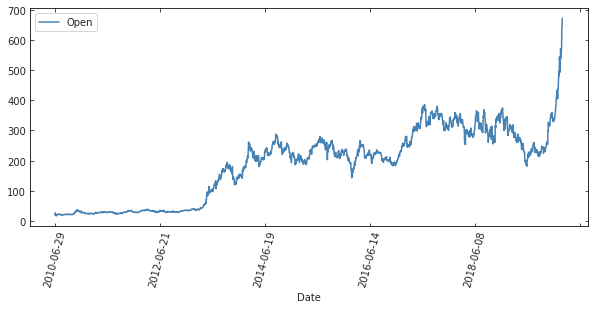

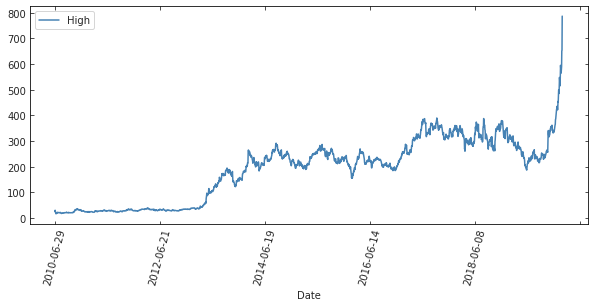

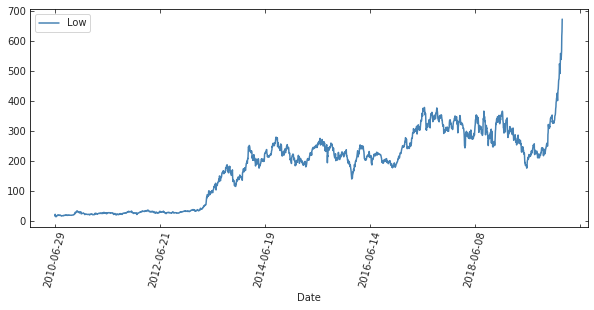

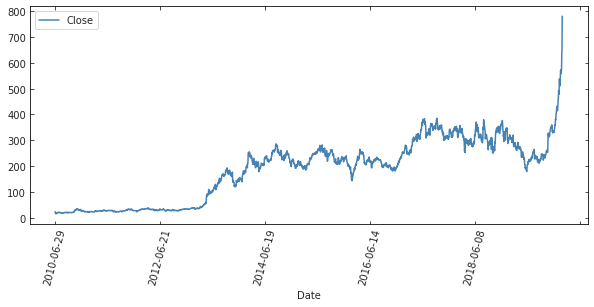

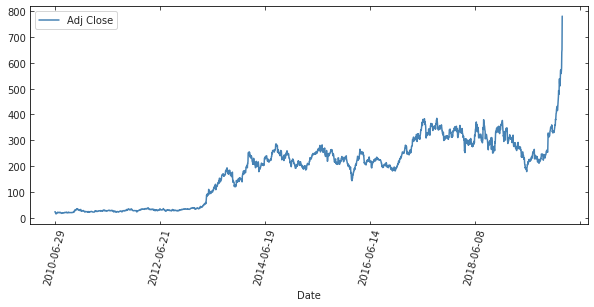

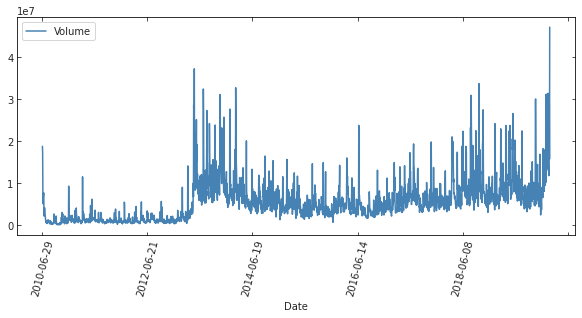

In [48]:
for c in tesla.columns:
    print(c)
    fig, ax = pl.subplots(figsize=(10,4))
    tesla.plot(y=c, ax=ax, rot=75)

tesla.shape

## visualizing correlations

use ```pandas.plotting.scatter_matrix```  to look at the relationship between lightcurves

plot the pairwise correlation as a heatmap using ```pl.imshow()```. You can access the pairwise correlation with the dataframe method ```df.corr()```

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


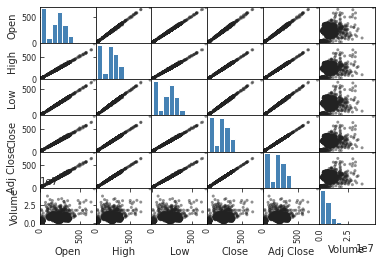

In [49]:
from pandas.plotting import scatter_matrix
#ax, fig = pl.subplots(1, figsize=(10,10))
#print(ax, fig)
scatter_matrix(tesla, color="#222222")
pl.savefig("test_SM.png")
!

In [50]:
!ls

tesla-stock-data-from-2010-to-2020.zip	test_SM.png  TSLA.csv


In [51]:
tesla.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999425,0.999575,0.998886,0.998886,0.501762
High,0.999425,1.000000,0.999389,0.999640,0.999640,0.512944
Low,0.999575,0.999389,1.000000,0.999447,0.999447,0.493496
Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Adj Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Volume,0.501762,0.512944,0.493496,0.505169,0.505169,1.000000


findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


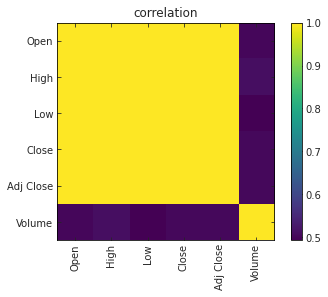

In [52]:
pl.imshow(tesla.corr())
pl.colorbar()
pl.title("correlation")
pl.xticks(range(len(tesla.columns)), tesla.columns, rotation=90)
pl.yticks(range(len(tesla.columns)), tesla.columns);


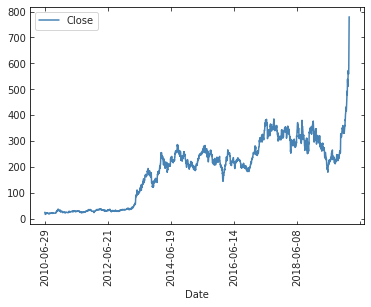

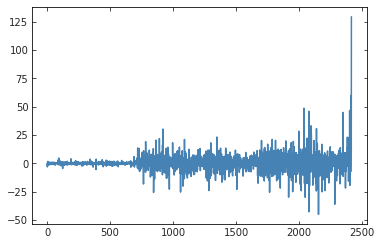

In [53]:
#differenciating a time series by subtracting it from itself at a lag 
ax = tesla.plot(y="Close", rot=90)
pl.figure()
pl.plot(tesla.Close.values[1:] - tesla.Close.values[:-1])
